# **Arms Trade: Initial Visualisations**

## Objectives

* Verify data distributions (normality, skewness).

* Identify relationships that are statistically significant.

* Check variance and correlations between features.

* Test whether country or weapon-type groups differ significantly in transfer values.

* Check overall structure of data

## Inputs

* The cleaned dataset (arms) as created in the previous section will be necessary for this section

## Outputs

* I plan to create a wide range of visualisations for both statistical and exploratory purposes

## Additional Comments

* I'll be using Matplotlib and Seaborn to compare the effectiveness of both libraries



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\jackr\\OneDrive\\Desktop\\my_projects\\Capstone\\Arms-Import-Export-Analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\jackr\\OneDrive\\Desktop\\my_projects\\Capstone\\Arms-Import-Export-Analysis'

In [4]:
print(os.listdir())

['.git', '.gitignore', '.python-version', '.slugignore', '.venv', 'data_folder', 'jupyter_notebooks', 'Procfile', 'README.md', 'requirements.txt', 'setup.sh']


# Probability and Statistical Testing

In this section visualisations will be created for the purpose of checking normality, skewness, variance and other parameters.

Here the necessary libraries will be imported.

In [22]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats

Now the cleaned dataset produced at the end of the ETL section can be parsed into a dataframe.

In [6]:
arms_enhance_df = pd.read_csv('data_folder/Processed/arms_trade_cleaned.csv')
arms_enhance_df.head()

,OrderDate,TransactionID,Recipient,Supplier,Number ordered,Weapon designation,Weapon description,Number delivered,status,Comments,SIPRI TIV per unit,SIPRI TIV for total order,SIPRI TIV of delivered weapons,Supplier_Total_TIV,Recipient_Total_TIV,Trade_Volume,Decade,Trade_Frequency
0,2002-01-01,Russia_2002.0_0,Afghanistan,Russia,3.0,Mi-17,transport helicopter,3.0,Second hand,Second-hand; aid,2.90,8.70,8.70,165817.26,15809.14,11,2000.0,6
1,2007-01-01,Turkiye_2007.0_1,Afghanistan,Turkiye,24.0,M-114 155mm,towed gun,24.0,Second hand,Second-hand; aid,0.20,4.80,4.80,6689.54,15809.14,1,2000.0,1
2,2004-01-01,United States_2004.0_2,Afghanistan,United States,188.0,M-113,armoured personnel carrier,188.0,Second hand,Second-hand; aid; M-113A2 version; incl 15 M-5...,0.10,18.80,18.80,849588.93,15809.14,34,2000.0,3
3,2016-01-01,United States_2016.0_3,Afghanistan,United States,53.0,S-70 Black Hawk,transport helicopter,53.0,Second hand but modernized,Second-hand UH-60A modernized to UH-60A+ befor...,4.29,227.37,227.37,849588.93,15809.14,34,2010.0,31
4,1973-01-01,Soviet Union_1973.0_4,Afghanistan,Soviet Union,100.0,T-62,tank,100.0,New,No additional info,1.80,180.00,180.00,452121.07,15809.14,82,1970.0,25


Starting off, the distribution of trade values will be visualised

c:\Users\jackr\OneDrive\Desktop\my_projects\Capstone\Arms-Import-Export-Analysis\.venv\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


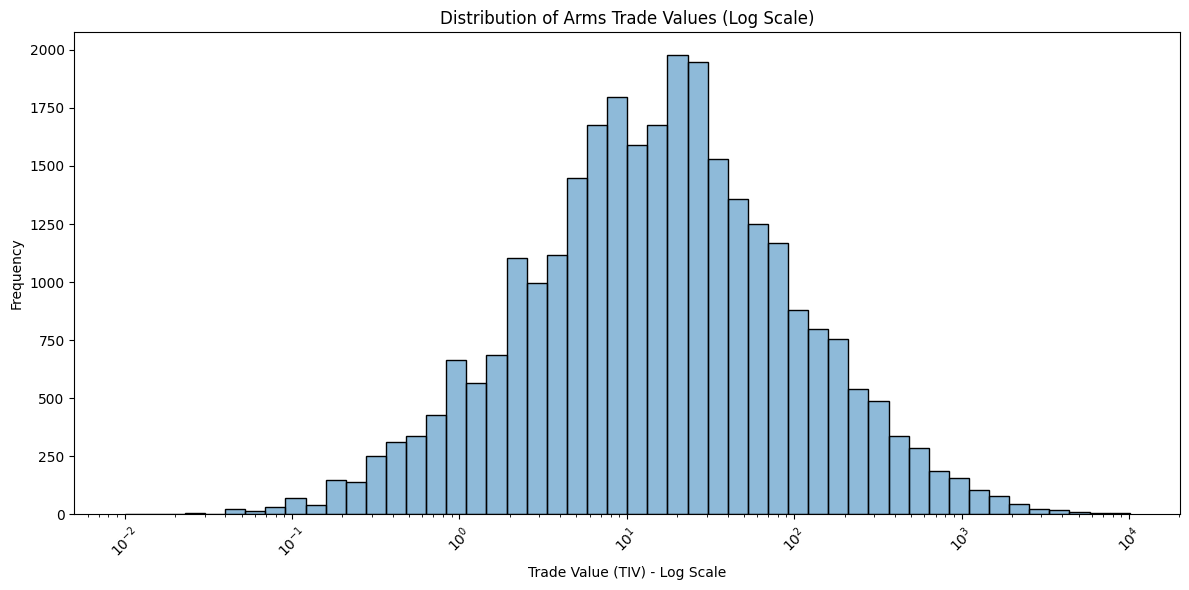

In [ ]:
plt.figure(figsize=(12, 6))

# Plot with log scale and adjusted bins
sns.histplot(data=arms_enhance_df, x='SIPRI TIV for total order', 
             kde=True,
             log_scale=True,  # log scale for better distribution visibility
             bins=50)         

plt.title('Distribution of Arms Trade Values (Log Scale)', fontsize=12)
plt.xlabel('Trade Value (TIV) - Log Scale', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

The distribution of arms trade values showed strong right-skew in its original form but was very hard to interpret due to scale, with most deals having lower values while a few high-value deals significantly increase the average. This suggests that the global arms trade is dominated by a small number of large transactions, which could have implications for discovering countries with disproportionately high geo-political influence.

After applying the log transformation, the distribution appears normal. The normal shape indicates that the trade values tend to cluster around a central value when viewed on a logarithmic scale, with roughly symmetric deviations above and below this central value. This transformation makes the data more receptive to statistical analysis that assumes normality and suggests that future analyses and modelling might benefit from working with log-transformed values.

Next is a QQ plot to check normality before a log scale is applied

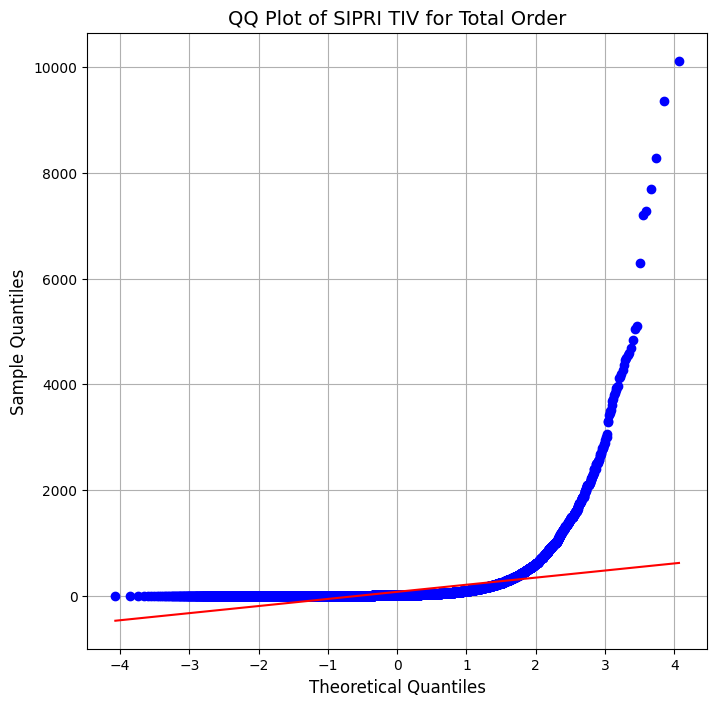

In [ ]:
plt.figure(figsize=(8, 8))
stats.probplot(arms_enhance_df['SIPRI TIV for total order'], dist="norm", plot=plt)
plt.title('QQ Plot of SIPRI TIV for Total Order', fontsize=14)
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.grid(True)
plt.show()

This visualisation outlines the exponential distribution of the TIV per order values. They are heavily right skewed within Quantiles 1-4. This gives further validity to the observation of disproportionate influence but might have a negative impact when used for further statistical analysis

Moving onto probability, some insights might be found when looking at probability distribution for each decade.

c:\Users\jackr\OneDrive\Desktop\my_projects\Capstone\Arms-Import-Export-Analysis\.venv\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\jackr\AppData\Local\Temp\ipykernel_99676\1616511829.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=arms_enhance_df,


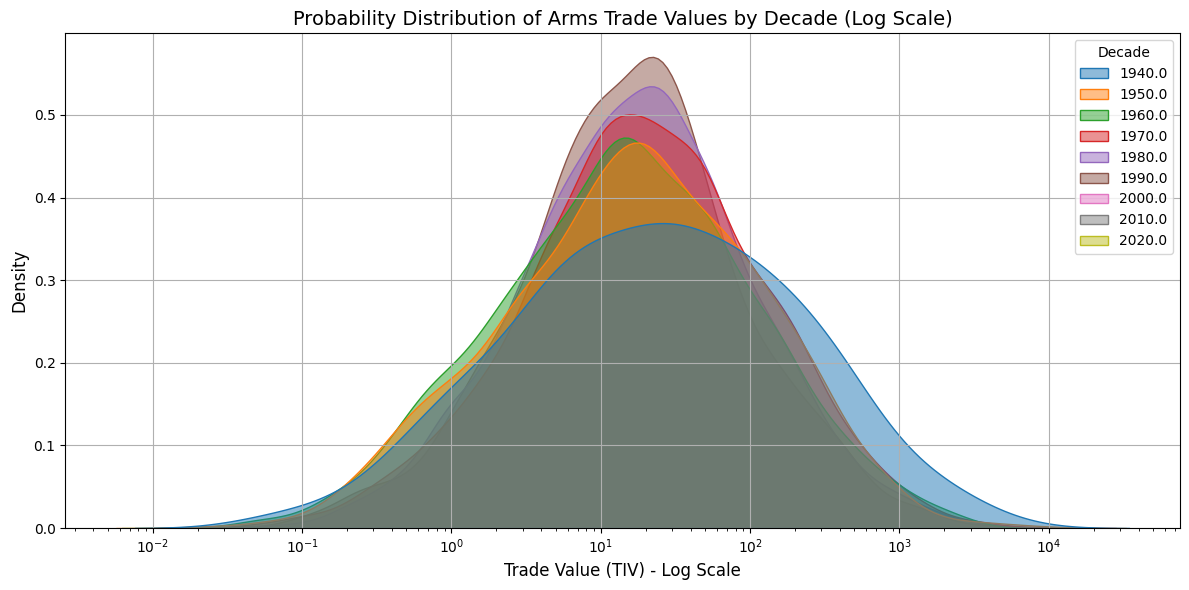

In [41]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=arms_enhance_df,
            x='SIPRI TIV for total order', 
            hue='Decade', 
            palette='tab10',
            fill=True, 
            common_norm=False, 
            alpha=0.5, 
            log_scale=True)  # log scale for better visibility
plt.title('Probability Distribution of Arms Trade Values by Decade (Log Scale)', fontsize=14)
plt.xlabel('Trade Value (TIV) - Log Scale', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


The kernel density estimation (KDE) plots by decade reveal several key probabilistic characteristics of arms trade values

The overlapping densities between decades, particularly in the middle range of the log-transformed values (around 10^2 to 10^3), demonstrate a consistent baseline of routine arms transfers. However, the varying heights of density peaks across decades point to shifting probabilities in the occurrence of deals of different magnitudes.

The probability mass in the upper tail (> 10^3) shows remarkable persistence across decades, indicating that high-value trades occur with similar relative frequency regardless of the time period. This suggests the presence of a stable elite tier of arms trading relationships that withstand the test of time in the global arms market.

---

# Exploratory Analysis

Moving away from probability and statistics this section will primarily focus on categorical variables and time series analysis

The first point to touch on will be TIV over time to see trends in the global arms market

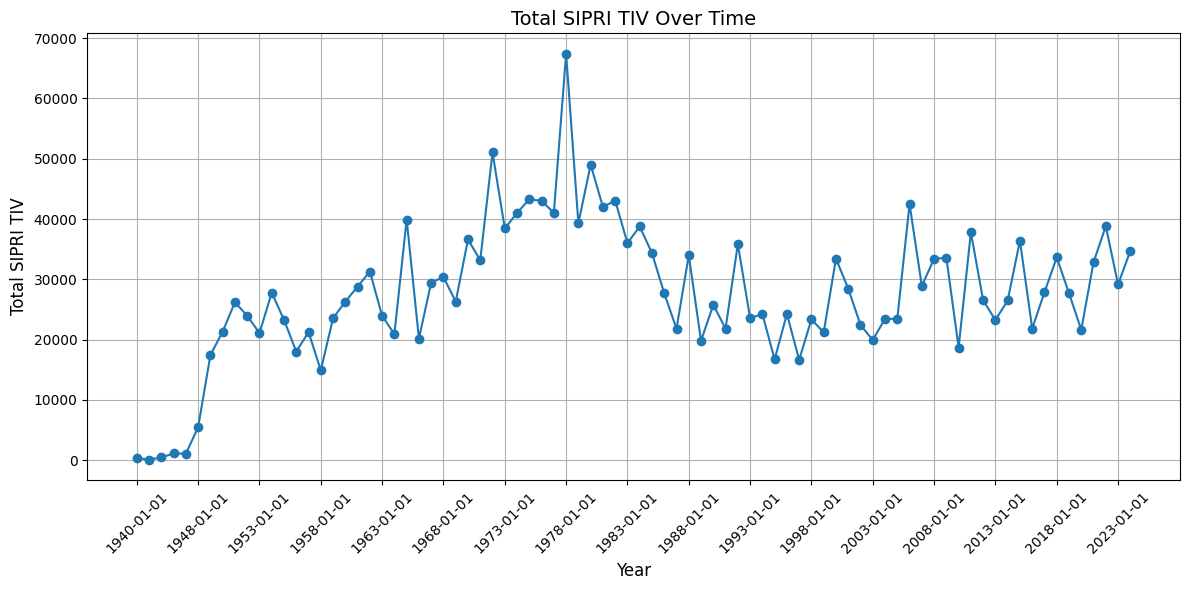

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(arms_enhance_df.groupby('OrderDate')['SIPRI TIV for total order'].sum(), marker='o')
plt.title('Total SIPRI TIV Over Time', fontsize=14)
plt.xticks(np.arange(0, len(arms_enhance_df['OrderDate'].unique()), step=5), rotation=45)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total SIPRI TIV', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Here it's easy to see, and relate to past events, trends in arms imports/exports. It's remarkable to see the peak in 1978 being the highest by such a wide margin, as this was the start of the Afghan War. The reason for this peak being so high was the Soviet Union and the United States both pouring arms and vehicles into Afghanistan to support their respective parties. Similar peaks can be spotted in relation to the Vietnam War (1965), the US/UK invasion of Afghanistan (2001) and the US/UK invasion of Iraq (2006).

More broadly you can see that the arms trade more or less stabilised after 1988, with trends mainly appearing due to world events rather than an overall increase or decrease over time. Yes revenue has more than likely increased over time but the exchange of military strength (TIV) is more balanced.

Moving onto top 10 Suppliers and reciepients now

C:\Users\jackr\AppData\Local\Temp\ipykernel_99676\1465825578.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_suppliers.values, y=top_suppliers.index, palette='viridis')
C:\Users\jackr\AppData\Local\Temp\ipykernel_99676\1465825578.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_recipients.values, y=top_recipients.index, palette='magma')


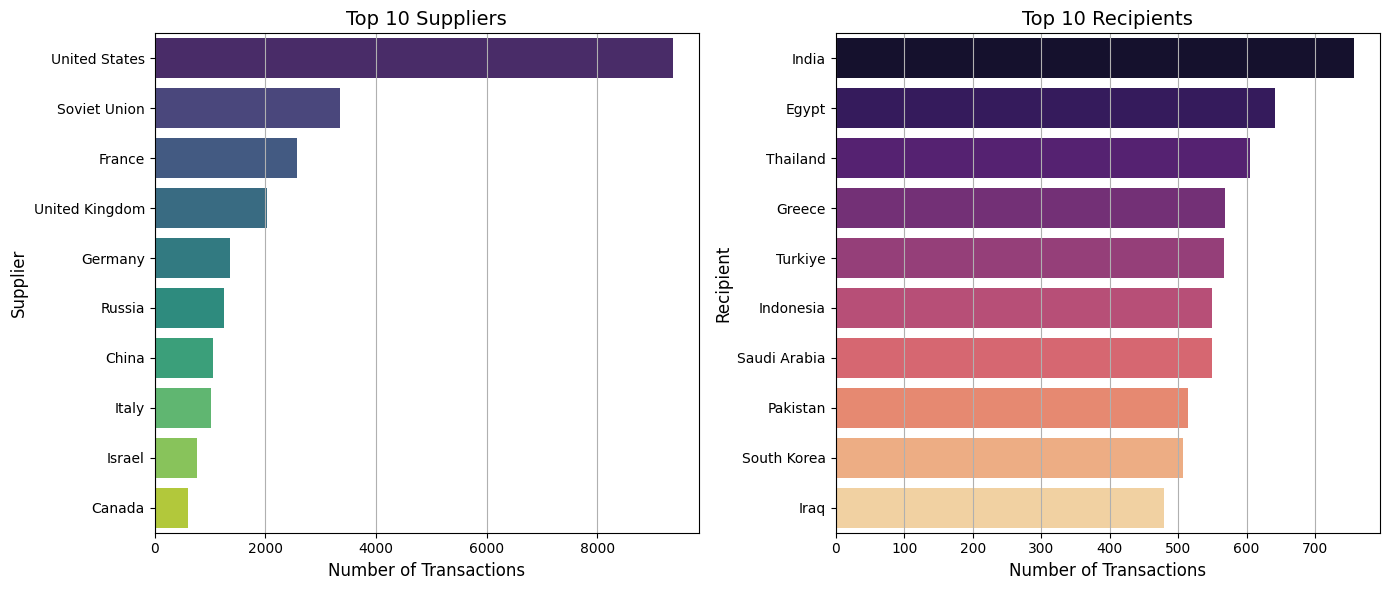

In [ ]:
# Calculating top 10 suppliers and recipients
top_suppliers = arms_enhance_df['Supplier'].value_counts().head(10)
top_recipients = arms_enhance_df['Recipient'].value_counts().head(10)

# Creating side-by-side bar plots
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=top_suppliers.values, y=top_suppliers.index, palette='viridis')
plt.title('Top 10 Suppliers', fontsize=14)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Supplier', fontsize=12)
plt.grid(axis='x')
plt.subplot(1, 2, 2)
sns.barplot(x=top_recipients.values, y=top_recipients.index, palette='magma')
plt.title('Top 10 Recipients', fontsize=14)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Recipient', fontsize=12)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

I think it's fair to say the United States may have a monopoly on arms exports, I was fully expecting the US to be the top supplier but I can't say I anticipated this wide a margin. It's especially interesting to see the contrast between the US and the now dissolved Soviet Union as their rivalry was practically defined by their engagement in proxy wars, it would seem that the United States had and currently have a disproportionate influence on supplying arms.

As for recipients India is well known for being a mass arms importer due to a combination of having a weak domestic arms market and aspirations to become a geo-political superpower, the weak domestic market could be a good descriptor of a lot of the countries here.

Finally we will look at the relationship between weapon types and trade volume

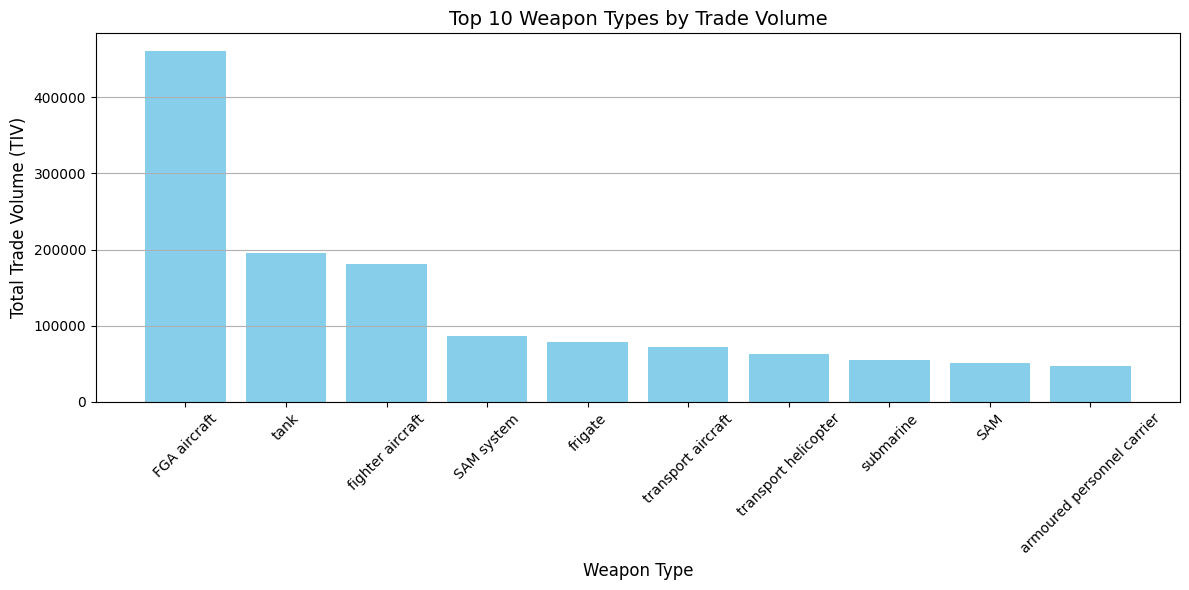

In [ ]:
plt.figure(figsize=(12, 6))

# Calculating total trade volume by weapon type
weapon_trade_volume = arms_enhance_df.groupby('Weapon description')['SIPRI TIV for total order'].sum().sort_values(ascending=False).head(10)

plt.bar(weapon_trade_volume.index, weapon_trade_volume.values, color='skyblue')
plt.title('Top 10 Weapon Types by Trade Volume', fontsize=14)
plt.xlabel('Weapon Type', fontsize=12)
plt.ylabel('Total Trade Volume (TIV)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()




Over a broad period it's clear that the FGA (Fighter-Ground Attack) Aircraft a.k.a Multi-role fighters are the most popular export/import, this correlates heavily with the United States' high export volume as American defense contractors like Lockheed Martin, Boeing and Northrop Grumman are known for their technologically advanced FGA aircraft like Lockheed's F35 Lightning, Northrop's F-5 Tiger and Boeing's F/A 18 Super Hornet.

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [7]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)